In [8]:
import os
import pandas as pd
import tensorflow as tf
from tensorboard.backend.event_processing import event_accumulator

def extract_data_from_log(log_dir):
    ea = event_accumulator.EventAccumulator(log_dir)
    ea.Reload()
    
    data = {}
    for tag in ea.Tags()['scalars']:
        data[tag] = pd.DataFrame(ea.Scalars(tag))
        data[tag].rename(columns={"step": "Step", "value": tag}, inplace=True)
    
    return data

log_dir = 'tb_data\\experiment_SimpleCNN_EWC'
data = extract_data_from_log(log_dir)


In [20]:
data.keys()

dict_keys(['Top1_Acc_MB/train_phase/train_stream/Task000', 'Loss_MB/train_phase/train_stream/Task000', 'RunningTime_Epoch/train_phase/train_stream/Task000', 'Top1_Acc_Epoch/train_phase/train_stream/Task000', 'Loss_Epoch/train_phase/train_stream/Task000', 'Time_Epoch/train_phase/train_stream/Task000', 'Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp000', 'Loss_Exp/eval_phase/test_stream/Task000/Exp000', 'Top1_Acc_Stream/eval_phase/test_stream/Task000', 'Loss_Stream/eval_phase/test_stream/Task000', 'StreamForgetting/eval_phase/test_stream', 'Top1_ClassAcc_Stream/eval_phase/test_stream/Task000/0', 'Top1_ClassAcc_Stream/eval_phase/test_stream/Task000/1', 'Top1_ClassAcc_Stream/eval_phase/test_stream/Task000/2', 'Top1_ClassAcc_Stream/eval_phase/test_stream/Task000/3', 'Top1_ClassAcc_Stream/eval_phase/test_stream/Task000/4', 'Top1_ClassAcc_Stream/eval_phase/test_stream/Task000/5', 'Top1_ClassAcc_Stream/eval_phase/test_stream/Task000/6', 'Top1_ClassAcc_Stream/eval_phase/test_stream/Task000/7',

In [21]:
colMerge = list(data.keys())[0]
colMerge1 = list(data.keys())[1]

In [25]:
data[colMerge]

,wall_time,Step,Top1_Acc_MB/train_phase/train_stream/Task000
0,1.720130e+09,0,0.15625
1,1.720130e+09,1,0.12500
2,1.720130e+09,2,0.09375
3,1.720130e+09,3,0.12500
4,1.720130e+09,4,0.09375
...,...,...,...
3745,1.720134e+09,3745,1.00000
3746,1.720134e+09,3746,0.96875
3747,1.720134e+09,3747,0.96875
3748,1.720134e+09,3748,1.00000


In [22]:
merged_data = pd.merge(data[colMerge],data[colMerge1], on='Step')


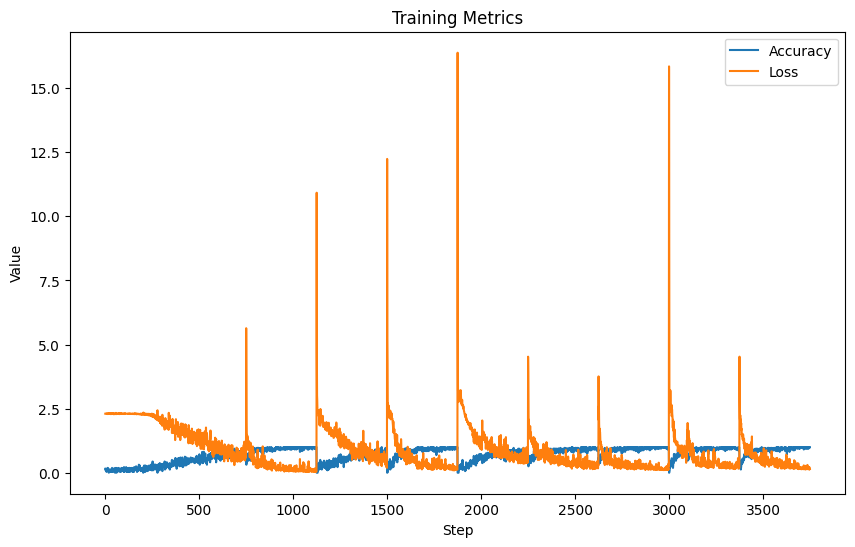

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(merged_data['Step'], merged_data[colMerge], label='Accuracy')
plt.plot(merged_data['Step'], merged_data[colMerge1], label='Loss')
plt.xlabel('Step')
plt.ylabel('Value')
plt.legend()
plt.title('Training Metrics')
plt.show()
